In [1]:
! which python

/Users/jreyes/opt/miniconda3/envs/research/bin/python


In [2]:
import numpy as np

from scipy.stats import beta

from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
"""

    define the number of trials and the probabilities of the bandits

"""

NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [4]:
"""

    bandit class

"""

class bandit( object ):
    
    def __init__(self, p):
        
        self.p = p
        self.a = 1
        self.b = 1
        
    def pull(self):
        
        return np.random.random() < self.p
    
    def sample(self):
        
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        
        self.a += x
        self.b += 1 - x

In [5]:
"""

    plot beta distribution

"""

def plot(bandits, trial):
    
    x = np.linspace(0, 1, 200)
    
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label="real p: %.4f" % b.p)
  
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()

  0%|                                                                                                                                                                              | 0/2000 [00:00<?, ?it/s]

current samples: [0.8618033475131812, 0.09429445621382299, 0.24325357021062166]


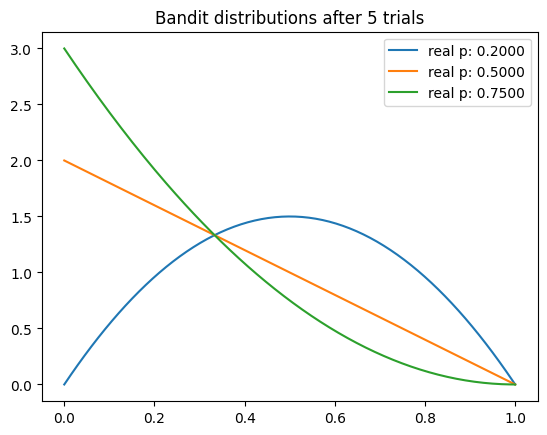

  0%|▍                                                                                                                                                                     | 6/2000 [00:00<00:41, 48.48it/s]

current samples: [0.4034522540402252, 0.2967896517390002, 0.8646479599031976]


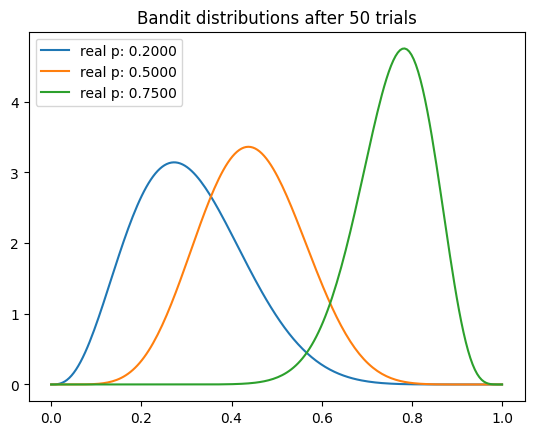

current samples: [0.10700561969536294, 0.4584908716533535, 0.7885618890321927]


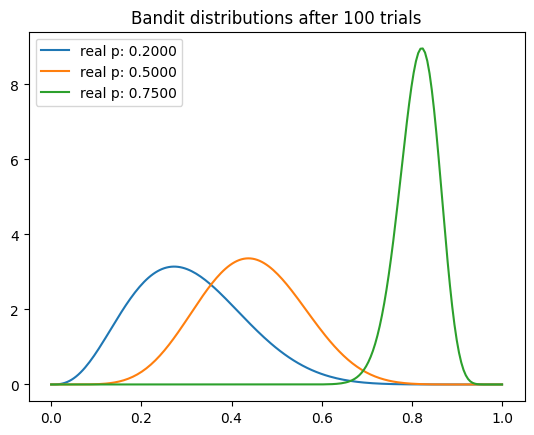

  5%|████████▏                                                                                                                                                          | 101/2000 [00:00<00:04, 379.94it/s]

current samples: [0.4272065633129233, 0.3599326783708611, 0.7237825140405724]


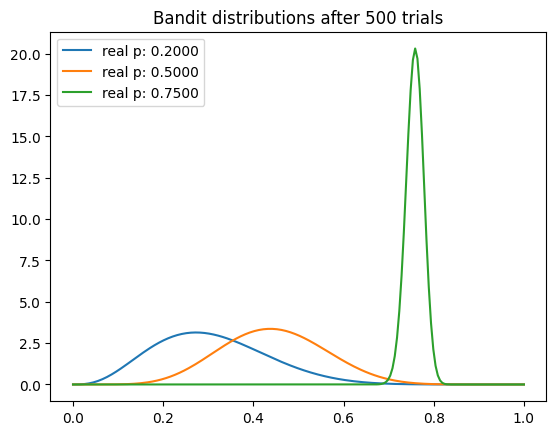

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 1355/2000 [00:00<00:00, 4680.28it/s]

current samples: [0.309738003685822, 0.5418426904493301, 0.7613188251285994]


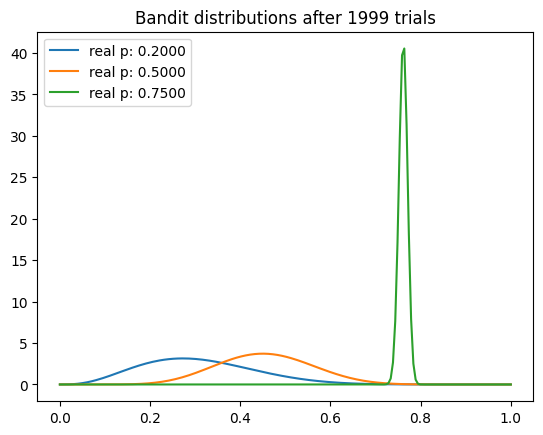

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 4004.27it/s]


In [6]:
"""

    experiment

"""

def experiment():
    
    # initialize each of the three bandits
    bandits = [ bandit(p) for p in BANDIT_PROBABILITIES ]
    
    # sample points
    sample_points = [5, 50, 100, 500, 1999]
    
    for i in tqdm( range(NUM_TRIALS) ):
        
        # get sample for each bandit
        best_bandit = None
        
        max_sample = -1
        all_samples = [] # collecting for debugging
        
        for b in bandits:
            
            sample = b.sample()
            all_samples.append( sample )
            
            if sample > max_sample:
                max_sample = sample
                best_bandit = b
                
        if i in sample_points:
            
            print(f'current samples: {all_samples}')
            plot(bandits, i)
            
        # pull the arm for the bandit with the largest sample
        x = best_bandit.pull()
        
        # update the distribution for the bandit whose arm we just pulled
        best_bandit.update(x)
    
experiment()